# **Graded Notebook**

#### **Dataset Information**

We will use the **Advertising dataset**. This dataset contains information on advertising budgets for TV, radio, and newspapers, and their relationship with product sales.

You can download the dataset using the following steps:

1. Open your web browser and navigate to this link: [Advertising.csv](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv)
2. Right-click on the page and select **Save As** (or the equivalent option in your browser).
3. Save the file as `Advertising.csv` in the same directory as this notebook.

## **Task 1: Predicting Sales from Advertising Data**

### **1. Data Exploration and Preparation (10 points)**

#### **1.1: Load, inspect and display the dataset (10 points)**
- Load the provided dataset (`Advertising.csv`).
- Display, print or plot any relevant information.
- What can you say about the data?


[[  1.  230.1  37.8  69.2  22.1]
 [  2.   44.5  39.3  45.1  10.4]
 [  3.   17.2  45.9  69.3   9.3]
 [  4.  151.5  41.3  58.5  18.5]
 [  5.  180.8  10.8  58.4  12.9]
 [  6.    8.7  48.9  75.    7.2]
 [  7.   57.5  32.8  23.5  11.8]
 [  8.  120.2  19.6  11.6  13.2]
 [  9.    8.6   2.1   1.    4.8]
 [ 10.  199.8   2.6  21.2  10.6]
 [ 11.   66.1   5.8  24.2   8.6]
 [ 12.  214.7  24.    4.   17.4]
 [ 13.   23.8  35.1  65.9   9.2]
 [ 14.   97.5   7.6   7.2   9.7]
 [ 15.  204.1  32.9  46.   19. ]
 [ 16.  195.4  47.7  52.9  22.4]
 [ 17.   67.8  36.6 114.   12.5]
 [ 18.  281.4  39.6  55.8  24.4]
 [ 19.   69.2  20.5  18.3  11.3]
 [ 20.  147.3  23.9  19.1  14.6]
 [ 21.  218.4  27.7  53.4  18. ]
 [ 22.  237.4   5.1  23.5  12.5]
 [ 23.   13.2  15.9  49.6   5.6]
 [ 24.  228.3  16.9  26.2  15.5]
 [ 25.   62.3  12.6  18.3   9.7]
 [ 26.  262.9   3.5  19.5  12. ]
 [ 27.  142.9  29.3  12.6  15. ]
 [ 28.  240.1  16.7  22.9  15.9]
 [ 29.  248.8  27.1  22.9  18.9]
 [ 30.   70.6  16.   40.8  10.5]
 [ 31.  29

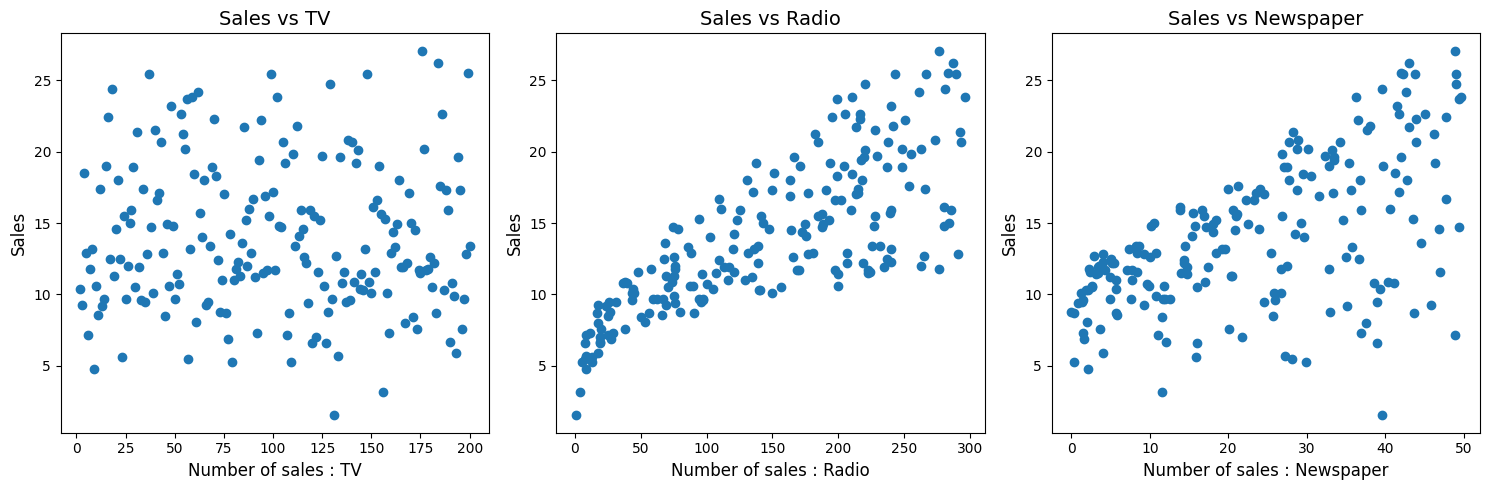

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#==============================================================================

# load data from csv file
file_name = 'Advertising.csv'
df = pd.read_csv(file_name)
data_array = df.to_numpy()
print(data_array)

# prepare data
target = data_array[1:, -1].astype(float)
features = data_array[1:, :-1].astype(float)
#print('target:', target)
#print('features:', features)
target_name = 'Sales'
feature_names = ['TV', 'Radio', 'Newspaper']
print('target_name:', target_name)
print('feature_names:', feature_names)

# Display relevant information
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(feature_names)):
    axs[i].scatter(features[:, i], target)
    axs[i].set_xlabel("Number of sales : " + feature_names[i] , fontsize=12)
    axs[i].set_ylabel(target_name, fontsize=12)
    axs[i].set_title(f'{target_name} vs {feature_names[i]}', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()  
plt.show()


# Explains TODO
- The dataset is composed of 200 rows and 4 columns.
- The columns are TV, Radio, Newspaper, and Sales.
- The features are TV, Radio, and Newspaper and the target is Sales.
- All the values are numerical and there are no missing values.

---

### **2. Regression Analysis (40 points)**

#### **2.1: Train a Linear Regression Model (15 points)**
- Train a linear regression model for each feature and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


Metrics for TV:
Training score: 0.005265279753996266
Test score: -0.02947735507364113
Mean Squared Error: 32.4101
Mean Absolute Error: 4.5955
R^2 Score: -0.0295
Metrics for Radio:
Training score: 0.5856775019473229
Test score: 0.6589211049342228
Mean Squared Error: 10.7379
Mean Absolute Error: 2.6804
R^2 Score: 0.6589
Metrics for Newspaper:
Training score: 0.3657626600082411
Test score: 0.2266350506985888
Mean Squared Error: 24.3472
Mean Absolute Error: 3.6124
R^2 Score: 0.2266


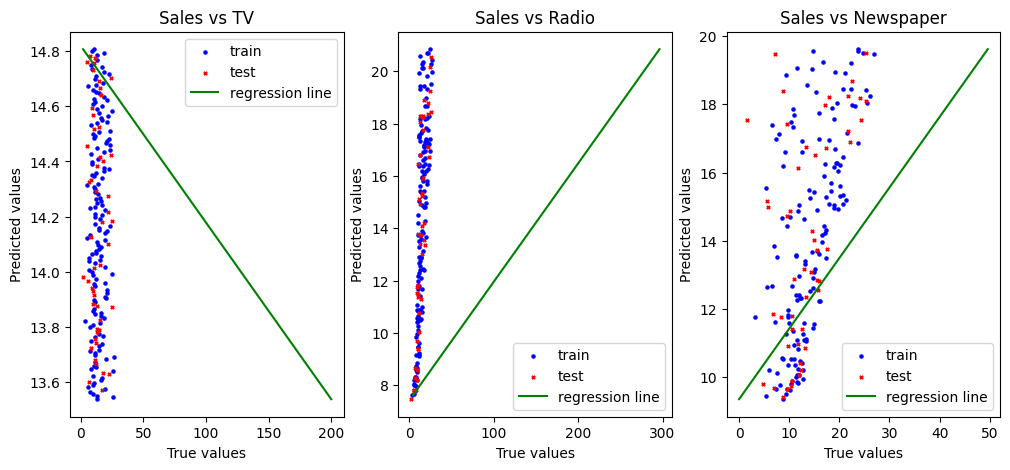

In [ ]:
# train a linear regression model
from colorama import Fore, Style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Split data into training and test sets for each feature
for i in range(len(feature_names)):
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target, random_state=0)
    X_test = X_test.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    X_train = X_train.reshape(-1, 1)
    Y_train = y_train.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    print(f'{Fore.GREEN}Metrics for {feature_names[i]}:{Style.RESET_ALL}')
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'Training score: {train_score}')
    print(f'Test score: {test_score}')

    # make predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    ##print('predictions:', predictions)

    # plot the model
    axs[i].scatter(y_train, model.predict(X_train), color='b', label='train',s=5)
    # plot predictions
    axs[i].scatter(y_test, y_pred_test, color='r', label='test',s=5,marker='x')
    # plot the function
    x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    y_pred_line = model.predict(x_range)
    axs[i].plot(x_range, y_pred_line, color='g', label='regression line')
   

    axs[i].set_xlabel('True values')
    axs[i].set_ylabel('Predicted values')
    axs[i].set_title(f'{target_name} vs {feature_names[i]}')
    axs[i].legend()
    
    # metrics
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
        
    
   
    print(f'{Fore.YELLOW}Mean Squared Error: {mse:.4f}{Style.RESET_ALL}')
    print(f'{Fore.YELLOW}Mean Absolute Error: {mae:.4f}{Style.RESET_ALL}')
    print(f'{Fore.YELLOW}R^2 Score: {r2:.4f}{Style.RESET_ALL}')
    
    # plot the metrics results just text
    
plt.show()




# TODO explain

#### **2.2: Polynomial Features (25 points)**
- Extend the regression model by adding polynomial features.
- Evaluate the models performances.
- Display, print or plot any relevant information.
- Discuss which model fits the data best and why.

Degree 1 Polynomial Regression:
Training Score: 0.8979
Test Score: 0.8812

Degree 2 Polynomial Regression:
Training Score: 0.9872
Test Score: 0.9788

Degree 3 Polynomial Regression:
Training Score: 0.9771
Test Score: 0.9172

Degree 4 Polynomial Regression:
Training Score: 0.9944
Test Score: 0.8320



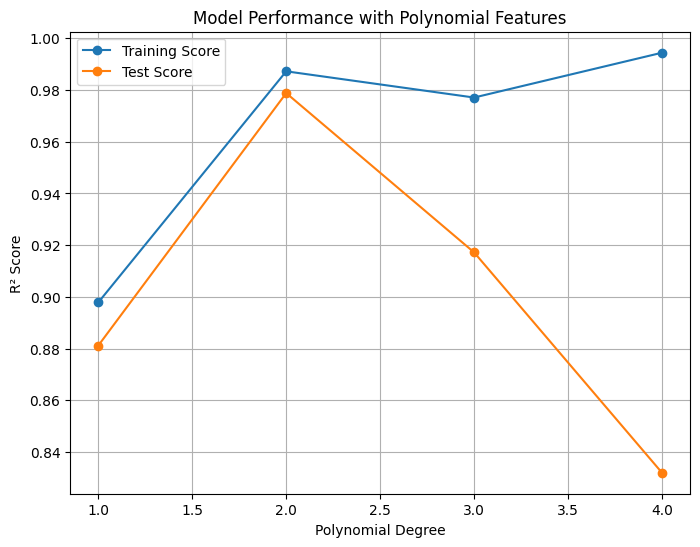

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = features  # Assuming 'features' is already defined
y = target    # Assuming 'target' is already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different degrees of polynomial features
degrees = np.arange(1, 5)
train_scores = []
test_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Evaluate the model
    train_score = model.score(X_train_poly, y_train)
    test_score = model.score(X_test_poly, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f'Degree {degree} Polynomial Regression:')
    print(f'Training Score: {train_score:.4f}')
    print(f'Test Score: {test_score:.4f}\n')

# Plot the training and test scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_scores, marker='o', label='Training Score')
plt.plot(degrees, test_scores, marker='o', label='Test Score')
plt.title('Model Performance with Polynomial Features')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()

# TODO explain

---

## **Task 2: Predicting High Sales with Classification**

In this task, you will create a binary classification model to predict whether sales are above a certain threshold based on the advertising data. This will help you understand how classification models can be applied to predict categories based on features.

### **1. Dataset Generation (10 points)**

#### **1.1: Transform the advertising dataset for classification (5 points)**

- Convert the target variable into a binary classification problem using the threshold of your choice.
- Display, print or plot any relevant information.
- Explain your threshold choice.

In [ ]:
# Threshold
max = features.max()
min = features.min()
avg = (max + min) / 2

Predictions: [12.93706802  0.65713189 13.84386182 11.82981238 14.73665079 12.24742605
 22.62772244 18.82291788  7.24003813 11.91950706 11.99637981 10.45675035
  9.06971575 12.17199361 16.24978375 12.65844107  6.0363479  23.70975533
  6.56466464 13.99206669 22.60785464 10.81873904 15.40569243 11.75386754
 12.57059309 12.51775331 10.64496877  8.69152898 14.32250043  9.36959109
  9.79736859 10.45631621 19.87564313 19.1746965  15.40788438 17.73050144
  9.43305769 20.48528023  6.61337952 11.01620087 17.62852492 21.05277777
 12.20347248 10.47517634 19.49873051 20.01137126 17.58380545  8.88661105
 23.15766645  6.72387408 13.29134128 11.87819524 16.47694468 14.33367347
 11.94660267 11.23504425 11.46418164  7.147576   11.62245373 15.62728374]


#### **1.2: Exploratory data analysis (5 points)**

- Display, print or plot any relevant information.
- How is each feature doing on this new classification task?

---

### **2. Classification (40 points)**

#### **2.1: Model Training and Evaluation (20 points)**

- Train several classification models and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


# TODO explain

#### **2.2: PCA (20 points)**

- Apply PCA and train the classification model of your choice.
- Display, print or plot any relevant information.
- Discuss how PCA affects model performance and interpret the results.

# TODO explain

---

## **Task 3 (Bonus): Unsupervised Learning**

In this task, you will use unsupervised learning techniques to explore and segment the data based on advertising budgets.

### **1. Clustering (10 points)**

#### **1.1: K-Means (10 points)**

- Apply K-Means clustering to segment the data. Feel free to use any feature or combinaison.
- Display, print or plot any relevant information.
- Discuss the characteristics of each cluster.

1-NN Regression for TV:
Training Score: 1.0000
Test Score: -2.0256

2-NN Regression for TV:
Training Score: 0.5706
Test Score: -1.6412

3-NN Regression for TV:
Training Score: 0.4327
Test Score: -1.0806

4-NN Regression for TV:
Training Score: 0.3232
Test Score: -0.8400

1-NN Regression for Radio:
Training Score: 0.9892
Test Score: 0.1626

2-NN Regression for Radio:
Training Score: 0.8146
Test Score: 0.3259

3-NN Regression for Radio:
Training Score: 0.7287
Test Score: 0.3352

4-NN Regression for Radio:
Training Score: 0.7005
Test Score: 0.4080

1-NN Regression for Newspaper:
Training Score: 0.8306
Test Score: -0.5164

2-NN Regression for Newspaper:
Training Score: 0.6310
Test Score: -0.0105

3-NN Regression for Newspaper:
Training Score: 0.5819
Test Score: 0.0166

4-NN Regression for Newspaper:
Training Score: 0.4994
Test Score: 0.1154



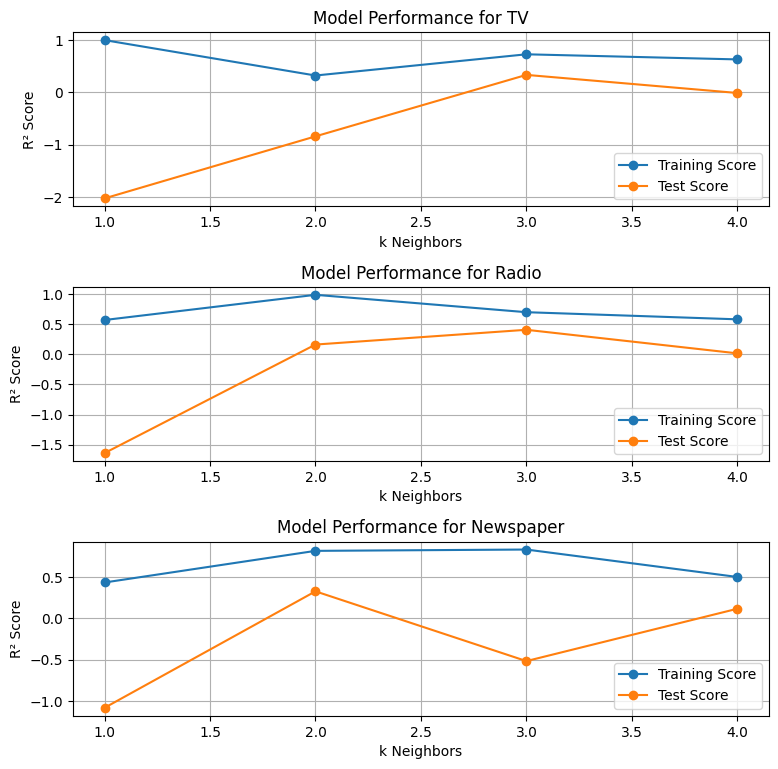

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#==============================================================================

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create a k-NN regression for each feature and try different values of k on each of them
k_values = np.arange(1, 5)
train_scores = []
test_scores = []

for i in range(3):
    for k in k_values:
        # Create and train the model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train[:, i].reshape(-1, 1), y_train)
        
        # Evaluate the model
        train_score = model.score(X_train[:, i].reshape(-1, 1), y_train)
        test_score = model.score(X_test[:, i].reshape(-1, 1), y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        print(f'{k}-NN Regression for {feature_names[i]}:')
        print(f'Training Score: {train_score:.4f}')
        print(f'Test Score: {test_score:.4f}\n')
        
# Plot the training and test scores with a subplot for each feature and under the k model preforment evolution
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(6, 2, 2*i + 1)
    plt.plot(k_values, train_scores[i::3], marker='o', label='Training Score')
    plt.plot(k_values, test_scores[i::3], marker='o', label='Test Score')
    plt.title(f'Model Performance for {feature_names[i]}')
    plt.xlabel('k Neighbors')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
plt.show()  



# TODO explain